In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Challenge 1 - Analysis of Variance


In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.



In [38]:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the head.



In [39]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to ValueNumeric. There is no need to multiply the value to be expressed in millions.



In [42]:
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
dtype: object

In [43]:
fifa['ValueNumeric'] = fifa['Value'].str.extract(r'(\d+.?\d+)').astype('float')

In [44]:
fifa['ValueNumeric2'] = np.where(fifa['Value'].str.findall(r'(\d+.?\d+K)'),
                                 fifa['ValueNumeric']/1000, fifa['ValueNumeric'])

In [45]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric,ValueNumeric2
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5,110.50
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0,77.00
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5,118.50
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0,72.00
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0,102.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,...,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,60.0,0.06
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,...,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,60.0,0.06
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,...,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,60.0,0.06
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,...,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,60.0,0.06


In [46]:
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
ValueNumeric      float64
ValueNumeric2     float64
dtype: object

We'd like to determine whether a player's preffered foot and position have an impact on their value.
Using the statsmodels library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the C function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column A, we will use df['A']).

In [47]:
fifa.rename({'Preferred Foot': 'PreferredFoot'}, axis=1, inplace=True)

In [48]:
fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'PreferredFoot', 'Position', 'Weak Foot', 'Acceleration', 'SprintSpeed',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'ValueNumeric', 'ValueNumeric2'],
      dtype='object')

In [50]:
# Fit and summarize ols model

model = ols('ValueNumeric2 ~ C(Position)*C(PreferredFoot)' ,data=fifa).fit()

table = sm.stats.anova_lm(model, typ=1)


table

,df,sum_sq,mean_sq,F,PR(>F)
C(Position),26.0,16542.387416,636.245670,19.940409,1.959293e-91
C(PreferredFoot),1.0,243.756270,243.756270,7.639501,5.716673e-03
C(Position):C(PreferredFoot),26.0,5795.963486,222.921673,6.986530,3.943684e-25
Residual,16580.0,529023.919477,31.907353,NaN,NaN


In [ ]:
## sum_sq: suma de cuadrados (qué tan dispersos se encuentran los datos entre ellos)
## df: parámetros libres que le dan la morfología a la distribución
## F: parámetro de Fisher --> inversamente proporcional al pvalue (número arriba de 1 indica alta confaibilidad)
## PR(>F): pvalue

## H0: no existe un impacto de un parámetro con otro 
## Fischer alto = p-value bajo: rechazo de H0 --> los grupos sí son independientes (sí hay diferencia) 
## y sí tienen un impacto en el valor numérico

What is your conclusion from this ANOVA?



**According to this ANOVA table, we can say that since the p-values [PR(>F)] are lower than 0.05 (alpha), we reject the null hypothesis (H0) and accept the alternative one (H1), that is, that the type of Positions and the  type of values in Preferred Position are different from each other and at the same time they both have an impact on the player's Value.**

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [52]:
# Fit and summarize ols model

model = ols('ValueNumeric2 ~ C(Nationality)' ,data=fifa).fit()


# type-1 anova summary 

table_nat = sm.stats.anova_lm(model, typ=1)

In [53]:
table_nat

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,32346.460361,198.444542,6.291491,2.699973e-120
Residual,16519.0,521037.937885,31.541736,NaN,NaN


What is your conclusion from this ANOVA?



**According to this ANOVA table, we can say that since the p-value [PR(>F)] for the Nationality column is lower than 0.05 (alpha), we reject the null hypothesis (H0) and accept the alternative one (H1), that is, that there is a difference in all Nationalities and at the same time his variable has an impact on the player's Value.**

## Challenge 2 - Linear Regression


Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.



In [54]:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
PreferredFoot      48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric     1525
ValueNumeric2    1525
dtype: int64

In [55]:
fifa.dropna(inplace=True)

In [56]:
fifa.isnull().sum()

Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club             0
Value            0
PreferredFoot    0
Position         0
Weak Foot        0
Acceleration     0
SprintSpeed      0
Stamina          0
Strength         0
LongShots        0
Aggression       0
Interceptions    0
Positioning      0
Vision           0
Penalties        0
ValueNumeric     0
ValueNumeric2    0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using statsmodels. Print the model summary.

Hint: remember to add an intercept to the model using the add_constant function.

In [57]:
#define response variable
y = fifa['ValueNumeric2']

#define predictor variables
x = fifa[['Stamina', 'SprintSpeed']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ValueNumeric2   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     400.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.07e-170
Time:                        21:55:09   Log-Likelihood:                -52332.
No. Observations:               16634   AIC:                         1.047e+05
Df Residuals:                   16631   BIC:                         1.047e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1676      0.207    -15.278      0.000      -3.574      -2.761
Stamina         0.0603      0.003     17.291      0.000       0.053       0.067
SprintSpeed     0.0258      0.004      6.820      0.000       0.018       0.033
==============================================================================
Omnibus:                    21313.755   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4225976.694
Skew:                           7.123   Prob(JB):                         0.00
Kurtosis:                      79.775   Cond. No.                         438.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.



Next, create a second regression model predicting value using potential. Create the model using statsmodels and print the model summary. Remember to add a constant term.



In [22]:
#define response variable
y = fifa['ValueNumeric2']

#define predictor variables
x = fifa['Potential']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ValueNumeric2   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     8095.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:39:44   Log-Likelihood:                -49425.
No. Observations:               16634   AIC:                         9.885e+04
Df Residuals:                   16632   BIC:                         9.887e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.7757      0.425    -84.261      0.000     -36.608     -34.943
Potential      0.5361      0.006     89.973      0.000       0.524       0.548
==============================================================================
Omnibus:                    21125.783   Durbin-Watson:                   0.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5343897.657
Skew:                           6.885   Prob(JB):                         0.00
Kurtosis:                      89.722   Cond. No.                         826.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.



**According to this summary, it seems that the model doesn't fit the data accurately at all, since R-squared
is equal to 0.327.**

**Another variables we should take into consideration is the coef column, which tells us
that the closer to zero this number is, the better the variable that accompanies it is as a predictor.
Hence, the Potential column with a coef of 0.5361 could have a 50% accuracy in predicting a player's Potential.**

Plot a scatter plot of value vs. potential. Do you see a linear relationship?



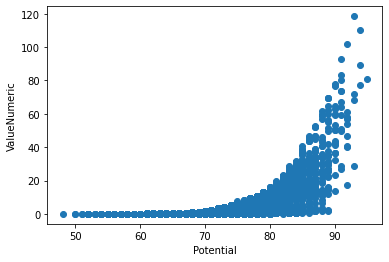

In [59]:
plt.scatter(fifa['Potential'], fifa['ValueNumeric2'])
plt.xlabel('Potential')
plt.ylabel('ValueNumeric')

plt.show()

In [63]:
## This graph definitely resembles an exponential distribution. We could say that a player's Value
## doesn't really start going up until he reaches around 75 pts in terms of Potential.